In [22]:
# samples X ,N=100, K 2개e
# ( mj, sj), j=1 or 2, pi
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def gauss_function(x, mean, var): #likelihood
    return 1/np.sqrt(2*np.pi*var) * np.exp(-1.0/2.0*var*((x-mean)**2))

def sum1toN (i,N):
    tmp=0
    for i in range(N+1):
        tmp+=i
    return tmp

[-0.4463452  -0.44837779 -0.53076478 -0.57358322 -0.47034755 -0.50309232
 -0.48169622 -0.55005373 -0.41275075 -0.4171594  -0.60171975 -0.57581301
 -0.49648533 -0.43993356 -0.40638273 -0.53055809 -0.76703099 -0.51996966
 -0.50098467 -0.4022368   0.84922441  1.26453791  1.12797886  1.04023474
  1.47424676  1.78736876  1.58933772  1.41917523  0.89186908  1.40864017
  1.18077912  1.44733152  1.35908008  1.08031429  1.75492745  1.56746514
  1.29259177  1.2598529   1.61874645  1.56623911  1.68909461  1.37365364
  1.20379178  1.41963171  0.95940995  1.4420674   1.27239306  1.70012241
  1.80394868  1.72526539]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


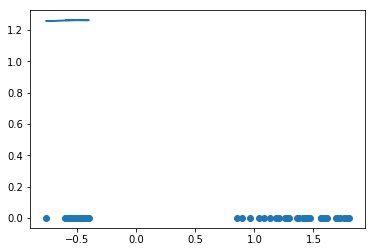

In [24]:
# 2 gaussian distribution
# 평균 표준편차 난수개수
samples = np.random.normal(-0.5, 0.1, 4*5)
#x=[]
g1= 1/np.sqrt(2*np.pi*0.1) * np.exp(-1.0/2.0*0.1*((x-(-0.5))**2))

samples = np.append(samples, np.random.normal(1.4, 0.3, 6*5))
print(samples)
print([0]* len(samples))

plt.scatter(samples,[0]* len(samples))
plt.plot(samples,gauss_function(samples,-0.5,))

In [14]:
pi_arr=[]
mean_arr=[]
var_arr=[]
sum_k=0.0
post_p=[[0.0]*2 for i in range(len(samples))]
N_arr=[0.0, 0.0]

sum_m=0.0
sum_v=0.0

#pi, mean, var 초기화
pi_arr.append(0.3)
pi_arr.append(0.7)

mean_arr.append(-0.4)
mean_arr.append(1.0)

var_arr.append(0.1)
var_arr.append(0.4)

#post_p[len(samples)-1][0]=pi_arr[0]*gauss_function(5,mean_arr[0],var_arr[0])
#print(post_p)
#print(pi_arr[0]+pi_arr[1])
#print(mean_arr)
#print(var_arr)


In [15]:
if pi_arr[0]+pi_arr[1] ==1.0:#and 0.0<=pi_arr[0]<=1.0:
#$for i in range(100):
    #E: 샘플의 가우시언 소속확률 추정
    for i in range(len(samples)):
        for j in range(2):
            for k in range(2):
                sum_k+=pi_arr[k] * gauss_function(samples[i],mean_arr[k],var_arr[k])

            post_p[i][j]=(pi_arr[j] * gauss_function(samples[i],mean_arr[j],var_arr[j])) / sum_k

    #print(post_p)
    #M : pi, mean, var 추정
    for j in range(2):
        for i in range(len(samples)):
            N_arr[j]+=post_p[i][j]
        #for i in range(len(samples)):
            sum_m+=post_p[i][j]*samples[i]
            sum_v+=post_p[i][j]*((samples[i]-mean_arr[j])**2)

        mean_arr[j]=(1/N_arr[j]) * sum_m
        var_arr[j]=(1/N_arr[j]) * sum_v
        pi_arr[j]=N_arr[j] / len(samples)

    #print(N_arr)

print(mean_arr) #-0.5, 1.4
print(var_arr)  #0.1, 0.3
print(pi_arr)   #0.4, 0.6



[-0.2351938561316267, -0.3550729129284757]
[0.4356995449888917, 2.3531600353076874]
[0.032522224755938765, 0.020930454045621546]
